# imdb데이터셋

In [4]:
from keras.datasets import imdb

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

#실행오류남 >> numpy version을 낮추면 해결가능

In [ ]:
import numpy as np
old = np.load
np.load = lambda *a,**k: old(*a,allow_pickle=True,**k)
from keras.datasets import reuters
(X_train, y_train),(X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)
np.load = olddel(old)

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict([value,key] for (key, value) in word_index.items())
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

# 데이터 준비

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# 신경망 모델 만들기

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [12]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#옵티마이저 설정하기
# from keras import optimizers

# model.compile(optimizer = optimizers.RMSprop(lr=0.001), loss = losses.binary_crossentropy, metrics=[metrics.binary_accuarcy])

In [ ]:
# 손실과 측정을 함수 객체로 지정하기
# from keras import losses
# from keras import metrics

# model.complie(optimizer=optimizers.RMSprop(lr=0.001), loss = losses.binary_crossentropy, metrics=[metrics.binary_accuarcy])

# 훈련검증

In [13]:
x_val = x_train[:10000]
partial_x_train=x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

In [15]:
history_dict=history.history

In [16]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

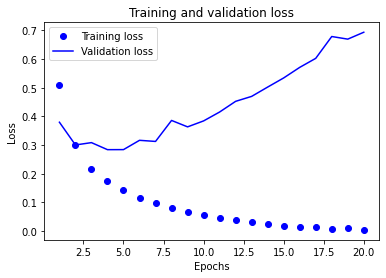

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') #bo는 파란색 점을 의미
plt.plot(epochs, val_loss, 'b', label='Validation loss') #b는 파란색 실선의미
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

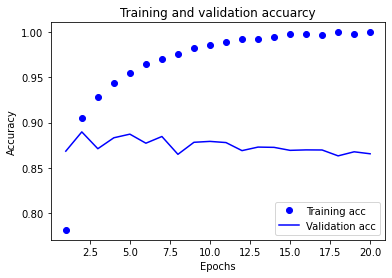

In [18]:
plt.clf() #그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/5
25000/25000 [==============================] - 2s 87us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/5
25000/25000 [==============================] - 2s 79us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/5
25000/25000 [==============================] - 2s 80us/step - loss: 0.1982 - acc: 0.9299
Epoch 4/5
25000/25000 [==============================] - 2s 80us/step - loss: 0.1679 - acc: 0.9404
Epoch 5/5
25000/25000 [==============================] - 2s 98us/step


In [21]:
results

[0.3155946758794785, 0.87964]

In [22]:
model.predict(x_test)

array([[0.20105363],
       [0.9999249 ],
       [0.72907454],
       ...,
       [0.12100816],
       [0.04819953],
       [0.7091064 ]], dtype=float32)

## 필기

배치사이즈 w값을 조정하는 횟수의 기준
ex) 100개의 데이터, 배치사이즈 100 >> 가중치 변경 1번
    100개의 데이터, 배치사이즈 1 >> 가중치 변경 100번
    
epoch는 학습 반복횟수
같은 내용을 얼마만큼 반복해서 loss율을 줄여가는가
>> 너무 많이 반복 시 오버피팅 일어날 확률 有

epoch를 몇번 하는게 적당한지는 그래프를 그려서 파악